# Stackoverflow Competition

**Team Members**:
- Timur Kasatkin
- Sergey Pinkevich

**Team name**: Timur&Sergey

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn as skl
import sklearn
import pandas as pd
import scipy
import seaborn as sns

In [3]:
from datetime import date

In [4]:
train_df = pd.read_csv("train.csv",parse_dates=["date"],\
                       dtype={"hour":object,"holiday":bool,"workingday":bool,"weekday":object,"weather_type":object}
#                       na_values={"ftemp":"-"},\
                      )

train_df.head()

,date,hour,holiday,workingday,weekday,weather_type,temp,ftemp,humidity,wind_speed,casual,subscribed,usage
0,2011-01-03,0,False,True,1,1,0.22,0.19699999999999998,0.44,0.3582,0,15,15
1,2011-01-03,1,False,True,1,1,0.20,0.1667,0.44,0.4179,0,6,6
2,2011-01-03,4,False,True,1,1,0.16,0.1364,0.47,0.3881,0,3,3
3,2011-01-03,5,False,True,1,1,0.16,0.1364,0.47,0.2836,0,9,9
4,2011-01-03,6,False,True,1,1,0.14,-,0.50,0.3881,0,90,90


In [5]:
print(train_df.pivot_table(values='casual',index='holiday'),\
     train_df.pivot_table(values='subscribed',index='holiday'),\
     train_df.pivot_table(values='usage',index='holiday'),sep='\n')

holiday
False    175.949792
True     206.072829
Name: casual, dtype: float64
holiday
False    461.585134
True     346.218487
Name: subscribed, dtype: float64
holiday
False    637.534926
True     552.291317
Name: usage, dtype: float64


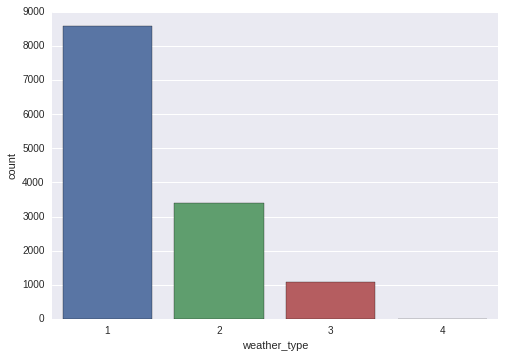

In [6]:
sns.countplot(train_df.weather_type);

In [7]:
train_df.dtypes

date            datetime64[ns]
hour                    object
holiday                   bool
workingday                bool
weekday                 object
weather_type            object
temp                   float64
ftemp                   object
humidity               float64
wind_speed             float64
casual                   int64
subscribed               int64
usage                    int64
dtype: object

# 1. Data investigation

In [8]:
train_df.corr()[:"wind_speed"]

,holiday,workingday,temp,humidity,wind_speed,casual,subscribed,usage
holiday,1.000000,-0.247877,-0.008131,0.006655,-0.019608,0.002130,-0.041417,-0.005842
workingday,-0.247877,1.000000,0.053103,0.025730,-0.004804,-0.015372,0.134013,0.010684
temp,-0.008131,0.053103,1.000000,-0.032506,-0.035742,0.040763,0.332923,0.103055
humidity,0.006655,0.025730,-0.032506,1.000000,-0.282958,-0.036357,-0.268173,-0.086425
wind_speed,-0.019608,-0.004804,-0.035742,-0.282958,1.000000,0.010544,0.080219,0.025531


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
date_scaler = MinMaxScaler()
train_df.date = date_scaler.fit_transform(train_df.date.astype(int)[:,newaxis])

/home/timur/dev_ides/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [11]:
train_df.head()

,date,hour,holiday,workingday,weekday,weather_type,temp,ftemp,humidity,wind_speed,casual,subscribed,usage
0,0.0,0,False,True,1,1,0.22,0.19699999999999998,0.44,0.3582,0,15,15
1,0.0,1,False,True,1,1,0.20,0.1667,0.44,0.4179,0,6,6
2,0.0,4,False,True,1,1,0.16,0.1364,0.47,0.3881,0,3,3
3,0.0,5,False,True,1,1,0.16,0.1364,0.47,0.2836,0,9,9
4,0.0,6,False,True,1,1,0.14,-,0.50,0.3881,0,90,90


train_df["date_bins"] = pd.cut(train_df.date,10, labels=range(1,11))

f, axes = subplots(3,sharex=True)

axes[0] = train_df.pivot_table(values="casual",index="date_bins",aggfunc=np.mean).plot.bar()
axes[1] = train_df.pivot_table(values="subscribed",index="date_bins", aggfunc=np.mean).plot.bar()
axes[2] = train_df.pivot_table(values="usage",index="date_bins", aggfunc=np.mean).plot.bar()

# 2. Data Preprocessing

In [12]:
ftemp_nonna_df = train_df[train_df.ftemp != '-']
ftemp_mean_dif = (ftemp_nonna_df.temp - ftemp_nonna_df.ftemp.astype(float)).mean()

In [13]:
train_df["ftemp_mean_diff"] = train_df.ftemp
train_df.loc[train_df.ftemp == '-', 'ftemp_mean_diff'] = train_df.temp - ftemp_mean_dif
train_df["ftemp_mean_diff"] = train_df.ftemp_mean_diff.astype(float)

In [14]:
train_df = pd.concat([train_df.loc[:,:"ftemp"], train_df.ftemp_mean_diff, train_df.loc[:,"humidity":"usage"]],axis=1)

In [15]:
train_df.head()

,date,hour,holiday,workingday,weekday,weather_type,temp,ftemp,ftemp_mean_diff,humidity,wind_speed,casual,subscribed,usage
0,0.0,0,False,True,1,1,0.22,0.19699999999999998,0.197000,0.44,0.3582,0,15,15
1,0.0,1,False,True,1,1,0.20,0.1667,0.166700,0.44,0.4179,0,6,6
2,0.0,4,False,True,1,1,0.16,0.1364,0.136400,0.47,0.3881,0,3,3
3,0.0,5,False,True,1,1,0.16,0.1364,0.136400,0.47,0.2836,0,9,9
4,0.0,6,False,True,1,1,0.14,-,0.119043,0.50,0.3881,0,90,90


from common.feature_transformations import get_one_hot_encoding

train_df["datetime"] = (train_df.date + train_df.hour.apply(lambda h: pd.DateOffset(hours=int(h)))).astype(int)

get_one_hot_encoding(train_df.weekday).as_matrix()[:,:-1]

holiday = get_one_hot_encoding(train_df.holiday).as_matrix()

workingday = get_one_hot_encoding(train_df.workingday).as_matrix()

hours = get_one_hot_encoding(train_df.hour).as_matrix()

weekday = get_one_hot_encoding(train_df.weekday).as_matrix()

weather_type = get_one_hot_encoding(train_df.weather_type).as_matrix()

from scipy.sparse import csr_matrix

discrete = scipy.sparse.hstack((csr_matrix(hours),\
                                csr_matrix(holiday),\
                                 csr_matrix(workingday),\
                                 csr_matrix(weekday),\
                                 csr_matrix(weather_type)))

In [16]:
discrete = pd.concat([train_df.hour.astype(int8),\
                      train_df.holiday,\
                      train_df.workingday,\
                      train_df.weekday.astype(int8)
                     ],axis=1)

In [17]:
continious = train_df[["date","temp","ftemp_mean_diff","humidity","wind_speed"]]

In [18]:
X_train = scipy.hstack((continious.as_matrix(),discrete.as_matrix()))

In [19]:
y_subscribed_train = train_df.subscribed
y_casual_train = train_df.casual
y_train = train_df.usage

# 3. Model Tuning

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import NuSVR,LinearSVR,SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor

/home/timur/dev_ides/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_absolute_error,r2_score

In [23]:
from sklearn.cross_validation import train_test_split

In [24]:
def MAE(est,X,y):
    return mean_absolute_error(y,est.predict(X))

def NegMAE(est,X,y):
    return -MAE(est,X,y)

def R2(est,X,y):
    return r2_score(y,est.predict(X))

def MAE_and_R2(est,X,y):
    return (MAE(est,X,y),R2(est,X,y))

In [25]:
clfs = [DecisionTreeRegressor(),NuSVR(),LinearSVR(),SVR(),KNeighborsRegressor(),XGBRegressor()]

In [32]:
for clf in clfs:
    print("subscribed:")
    print("	",type(clf))
    print("		MAE", cross_val_score(clf,X_train,y_subscribed_train,cv=10,n_jobs=-1,scoring=MAE).mean())
    print("		R2", cross_val_score(clf,X_train,y_subscribed_train,cv=10,n_jobs=-1,scoring=R2).mean())
    print("casual:")
    print("	",type(clf))
    print("		MAE", cross_val_score(clf,X_train,y_casual_train,cv=10,n_jobs=-1,scoring=MAE).mean())
    print("		R2", cross_val_score(clf,X_train,y_casual_train,cv=10,n_jobs=-1,scoring=R2).mean())

subscribed:
	 <class 'sklearn.tree.tree.DecisionTreeRegressor'>
		MAE 197.250948269
		R2 0.121317848746
casual:
	 <class 'sklearn.tree.tree.DecisionTreeRegressor'>
		MAE 125.684464411
		R2 -98.7826339242
subscribed:
	 <class 'sklearn.svm.classes.NuSVR'>
		MAE 245.97039915
		R2 0.100864566535
casual:
	 <class 'sklearn.svm.classes.NuSVR'>
		MAE 131.435035453
		R2 0.199873613623
subscribed:
	 <class 'sklearn.svm.classes.LinearSVR'>
		MAE 269.329573483
		R2 -0.0343620919507
casual:
	 <class 'sklearn.svm.classes.LinearSVR'>
		MAE 128.29148178
		R2 0.157544864573
subscribed:
	 <class 'sklearn.svm.classes.SVR'>
		MAE 219.177280329
		R2 0.177003562058
casual:
	 <class 'sklearn.svm.classes.SVR'>
		MAE 123.968722513
		R2 0.212870019411
subscribed:
	 <class 'sklearn.neighbors.regression.KNeighborsRegressor'>
		MAE 166.867641697
		R2 0.274074660816
casual:
	 <class 'sklearn.neighbors.regression.KNeighborsRegressor'>
		MAE 122.570730219
		R2 -30.8465633947
subscribed:
	 <class 'xgboost.sklearn.XGBR

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
grid = GridSearchCV(KNeighborsRegressor(),param_grid={"n_neighbors": range(1,50,1)},cv=10,scoring=NegMAE,n_jobs=-1)
grid.fit(X_train,y_casual_train)

grid.best_params_

{'n_neighbors': 2}

In [35]:
grid.fit(X_train,y_subscribed_train)

grid.best_params_

{'n_neighbors': 18}

In [26]:
casual_clf = KNeighborsRegressor(n_neighbors=2)
casual_clf.fit(X_train,y_casual_train)
subscribed_clf = KNeighborsRegressor(n_neighbors=18)
subscribed_clf.fit(X_train,y_subscribed_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=18, p=2,
          weights='uniform')

# Prediction

In [27]:
test_df = pd.read_csv('test.csv',parse_dates=["date"])
test_df.head()

,Id,date,hour,holiday,workingday,weekday,weather_type,temp,ftemp,humidity,wind_speed
0,0,2011-01-01,0,0,0,6,1,0.24,-,0.81,0.0
1,1,2011-01-01,1,0,0,6,1,0.22,0.2727,0.80,0.0
2,2,2011-01-01,2,0,0,6,1,0.22,-,0.80,0.0
3,3,2011-01-01,3,0,0,6,1,0.24,0.2879,0.75,0.0
4,4,2011-01-01,4,0,0,6,1,0.24,0.2879,0.75,0.0


In [28]:
test_df["date"] = date_scaler.transform(test_df.date.astype(int)[:,newaxis])

In [29]:
test_df["ftemp_mean_diff"] = test_df.ftemp
test_df.loc[test_df.ftemp == '-', 'ftemp_mean_diff'] = test_df.temp - ftemp_mean_dif
test_df["ftemp_mean_diff"] = test_df.ftemp_mean_diff.astype(float)

In [30]:
test_df.head()

,Id,date,hour,holiday,workingday,weekday,weather_type,temp,ftemp,humidity,wind_speed,ftemp_mean_diff
0,0,-0.002755,0,0,0,6,1,0.24,-,0.81,0.0,0.219043
1,1,-0.002755,1,0,0,6,1,0.22,0.2727,0.80,0.0,0.272700
2,2,-0.002755,2,0,0,6,1,0.22,-,0.80,0.0,0.199043
3,3,-0.002755,3,0,0,6,1,0.24,0.2879,0.75,0.0,0.287900
4,4,-0.002755,4,0,0,6,1,0.24,0.2879,0.75,0.0,0.287900


In [31]:
X_test = scipy.hstack((test_df[["date","temp","ftemp_mean_diff","humidity","wind_speed"]].as_matrix(),\
                       pd.concat([test_df.hour.astype(int8),\
                                  test_df.holiday,\
                                  test_df.workingday,\
                                  test_df.weekday.astype(int8)\
                                 ],axis=1).as_matrix()))

In [32]:
res = scipy.hstack([test_df.Id.as_matrix()[:,newaxis],\
                    (casual_clf.predict(X_test) + subscribed_clf.predict(X_test))[:,newaxis]])

In [33]:
res_df = pd.DataFrame(data=res,columns=['Id','Expected'])
res_df.Id = res_df.Id.astype(int)
res_df.head()

,Id,Expected
0,0,125.000000
1,1,115.833333
2,2,85.333333
3,3,34.500000
4,4,16.333333


In [36]:
res_df.to_csv('submission.csv',index=False)